# 1. Google Play Store apps and reviews

a. apps.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.
b. user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

In [24]:
# Read in dataset
import pandas as pd
apps_with_duplicates = pd.read_csv('googleplaystore.csv')
print(apps_with_duplicates.shape)

# Drop duplicates from apps_with_duplicates
apps1 = apps_with_duplicates.drop_duplicates(subset=["App", "Category"])

# Print the total number of apps
print('Total number of apps in the dataset = ', apps1.shape[0])

# Have a look at a random sample of 5 rows
import random
print(apps1.sample(n=5))

(10841, 13)
Total number of apps in the dataset =  9745
                                           App            Category  Rating  \
7441                        Grand Gangsters 3D                GAME     4.2   
7131                     C B Patel Health Club  HEALTH_AND_FITNESS     5.0   
2873                              Photo Editor         PHOTOGRAPHY     4.3   
7315  Betting Tips / Sports Tips by CG Tipster              SPORTS     4.1   
2590               textPlus: Free Text & Calls              SOCIAL     4.1   

     Reviews                Size     Installs  Type Price Content Rating  \
7441  401643  Varies with device  10,000,000+  Free     0           Teen   
7131       5                 14M         100+  Free     0       Everyone   
2873   42079                 17M   1,000,000+  Free     0       Everyone   
7315     315                7.7M      10,000+  Free     0       Everyone   
2590  382120                 28M  10,000,000+  Free     0       Everyone   

                Ge

# 2. Data cleaning

By looking at a random sample of the dataset rows (from the above task), we observe that some entries in the columns like Installs and Price have a few special characters (+ , and  ) due to the way the numbers have been represented. This prevents the columns from being purely numeric, making it difficult to use them in subsequent future mathematical calculations. Ideally, as their names suggest, we would want these columns to contain only digits from [0-9].</p>
<p>Hence, we now proceed to clean our data. Specifically, the special characters <code>,</code> and <code>+</code> present in <code>Installs</code> column and <code>$ present in Price column need to be removed.

In [25]:
apps = pd.DataFrame(apps1)
# List of characters to remove
chars_to_remove = ['+', ',', '$']
# List of column names to clean
cols_to_clean = ['Installs', 'Price']

for col in cols_to_clean:
     for char in chars_to_remove:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
        
# Print a summary of the apps dataframe
print(apps.info())
print(apps.shape)
print(apps['Installs'].head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9745 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9745 non-null   object 
 1   Category        9745 non-null   object 
 2   Rating          8281 non-null   float64
 3   Reviews         9745 non-null   object 
 4   Size            9745 non-null   object 
 5   Installs        9745 non-null   object 
 6   Type            9744 non-null   object 
 7   Price           9745 non-null   object 
 8   Content Rating  9744 non-null   object 
 9   Genres          9745 non-null   object 
 10  Last Updated    9745 non-null   object 
 11  Current Ver     9737 non-null   object 
 12  Android Ver     9742 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB
None
(9745, 13)
0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: object


# 3. Correcting data types

From the previous task we noticed that Installs and Price were categorized as object data type (and not int or float) as we would like. This is because these two columns originally had mixed input types: digits and special characters. To know more about Pandas data types, read this.

The four features that we will be working with most frequently henceforth are Installs, Size, Rating and Price. While Size and Rating are both float (i.e. purely numerical data types), we still need to work on Installs and Price to make them numeric.

It also looks like there are only a few rows for which apps.Installs = Free and apps.Price = Everyone. We can remove these rows. 

In [26]:
import numpy as np

print(apps.index[apps['Installs'] == 'Free'].tolist()) # Find the list of indices, where, apps['Installs'] == 'Free'
print(apps.index[apps['Price'] == 'Everyone'].tolist()) # Find the list of indices, where, apps['Price'] == 'Everyone'

# subset apps dataframe by ignoring any rows where apps['Installs'] == 'Free' or apps['Price'] == 'Everyone'
apps = apps[(apps['Installs'] != 'Free') & (apps['Price'] != 'Everyone')]
print(apps.shape)

# Convert Installs to float data type
apps['Installs'] = apps['Installs'].astype(float)

# Convert Price to float data type
apps['Price'] = apps['Price'].astype(float)

# Checking dtypes of the apps dataframe
print(apps.dtypes)

[10472]
[10472]
(9744, 13)
App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


# 5. Exploring app categories

In [27]:
import plotly.express as px

# Total number of unique categories
num_categories = apps['Category'].nunique()
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category'. 
num_apps_in_category = apps['Category'].value_counts()

fig = px.bar(num_apps_in_category, x=num_apps_in_category.index, y=num_apps_in_category.values, 
             title="Category Vs Number of apps")
fig.update_layout(xaxis_title=None, yaxis_title = 'Number of apps')
fig.show()

Number of categories =  33


# 6. Distribution of app ratings

In [28]:
import plotly.graph_objects as go

# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

fig = go.Figure(data=data, layout = layout)
fig.show()

Average app rating =  4.175084541062807


# 7. Size and price of an app

large_categories =                                App  Category  Rating  Reviews  \
187  Visual Voicemail by MetroPCS  BUSINESS     4.1    16129   
188             Indeed Job Search  BUSINESS     4.3   674730   
189                   Uber Driver  BUSINESS     4.4  1254730   
190          ADP Mobile Solutions  BUSINESS     4.3    85185   
191        Snag - Jobs Hiring Now  BUSINESS     4.3    32584   

                   Size    Installs  Type  Price Content Rating    Genres  \
187  Varies with device  10000000.0  Free    0.0       Everyone  Business   
188  Varies with device  50000000.0  Free    0.0       Everyone  Business   
189  Varies with device  10000000.0  Free    0.0       Everyone  Business   
190                 29M   5000000.0  Free    0.0       Everyone  Business   
191  Varies with device   1000000.0  Free    0.0       Everyone  Business   

       Last Updated         Current Ver         Android Ver  
187   July 30, 2018  Varies with device  Varies with device  
188    M

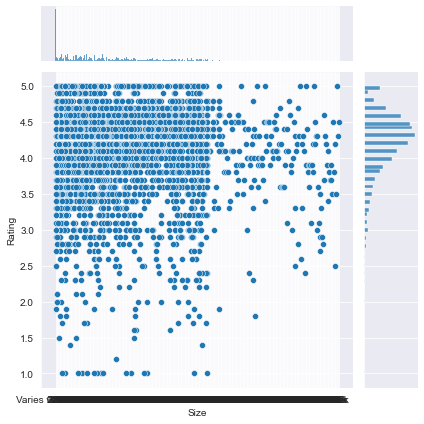

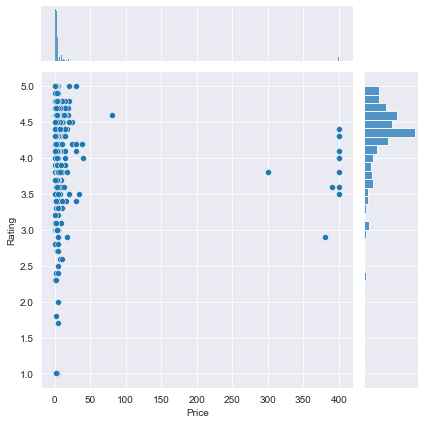

In [29]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_R_S = apps.dropna(subset=['Rating', 'Size'])

# Subset for categories with at least 250 apps using groupby by column and filter values with length
large_categories = apps_R_S.groupby('Category').filter(lambda x: len(x) >= 250)
print('large_categories = ', large_categories.head())

# mapping and getting True/False
apps_R_S['Category'].map(apps_R_S['Category'].value_counts()) >= 250

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

# Select apps whose 'Type' is 'Paid'
paid_apps = apps_R_S[apps_R_S['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

# 8. Relation between app category and app price

So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.

There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.

Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients. Below, we see that Medical and Family apps are the most expensive. Some medical apps extend even up to $80!  All game apps are reasonably priced below $20.

,Category,App,Price,Rating,Installs
4197,FAMILY,most expensive app (H),399.99,4.3,100.0
5354,FAMILY,I am Rich Plus,399.99,4.0,10000.0
5356,FINANCE,I Am Rich Premium,399.99,4.1,50000.0
5362,FAMILY,I Am Rich Pro,399.99,4.4,5000.0
5364,FINANCE,I am rich (Most expensive app),399.99,4.1,1000.0
5369,FINANCE,I am Rich,399.99,4.3,5000.0
5373,FINANCE,I AM RICH PRO PLUS,399.99,4.0,1000.0


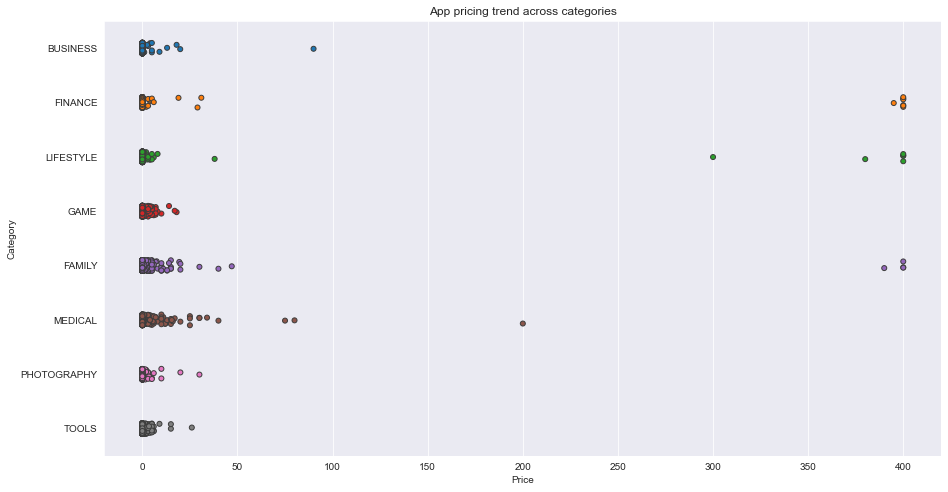

In [30]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200 and has rating above or equal to 4.0
apps_above_200 = apps[(apps['Price'] > 200) & (apps['Rating'] >= 4)]
apps_above_200[['Category', 'App', 'Price', 'Rating', 'Installs']]

# 9. Filter out "junk" apps

It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some app developer may create an app called I Am Rich Premium or most expensive app (H) just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.

Let's filter out these junk apps and re-do our visualization.

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

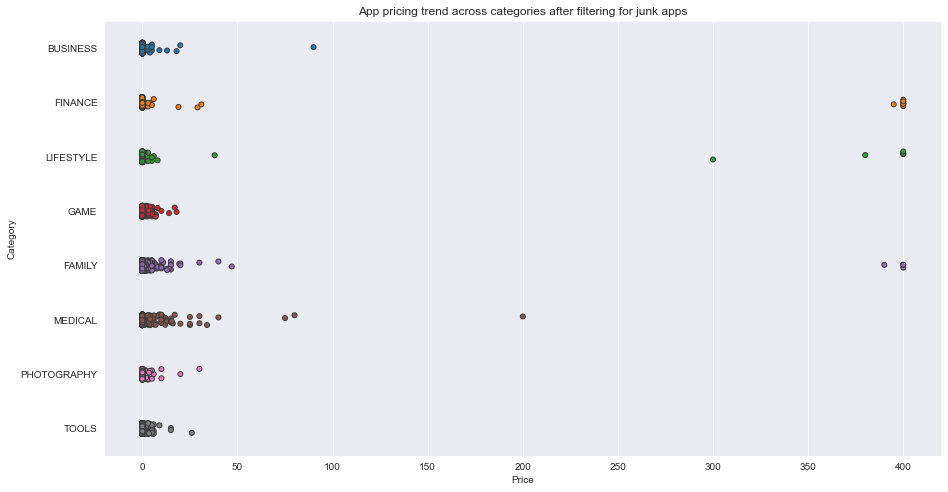

In [31]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], data = apps_under_100, 
                   jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

# 10. Popularity of paid apps vs free apps

For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:

1. Free to download.
2. Main source of income often comes from advertisements.
3. Often created by companies that have other products and the app serves as an extension of those products.
4. Can serve as a tool for customer retention, communication, and customer service.

Some characteristics of paid apps are:

1. Users are asked to pay once for the app to download and use it.
2. The user can't really get a feel for the app before buying it.

Are paid apps installed as much as free apps? It turns out that paid apps have a relatively lower number of installs than free apps, though the difference is not as stark as I would have expected!

In [32]:
num_apps_in_Type = apps['Type'].value_counts()
print(num_apps_in_Type)

trace0 = go.Box(
    # Data for paid apps
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True),
    xaxis=dict(title='App type', zeroline=False)
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
fig = go.Figure(data=data, layout = layout)
fig.show()

Free    8985
Paid     758
Name: Type, dtype: int64


## 10. Sentiment analysis of user reviews
<p>Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.</p>
<p>By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps, thereby syncing with our previous observation.</p>
<p>In this notebook, we analyzed over ten thousand apps from the Google Play Store. We can use our findings to inform our decisions should we ever wish to create an app ourselves.</p>

                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  
(64295, 5)


Text(0.5, 1.0, 'Sentiment Polarity Distribution')

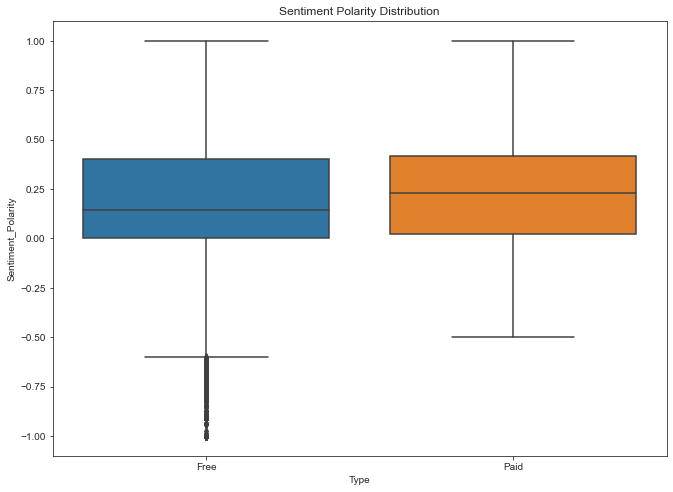

In [33]:
# Load user_reviews.csv
reviews_df = pd.read_csv('googleplaystore_user_reviews.csv')
print(reviews_df.head())
print(reviews_df.shape)

# Join the two dataframes
merged_df = apps.merge(reviews_df, on='App')

# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')